In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sb
import pandas as pd
import os

In [3]:
CHAINS = {}
configs = ['diag','NU_dense','IQU_dense','IQU-NU_dense']
noise_realization = '1'
nchains = 5

In [5]:
for config in configs:
    path = 'runs/mcmc_'+config+'/REAL_'+noise_realization
    CHAINS[config] = {}
    for n in range(nchains):
        CHAINS[config][str(n)] = {'acc_rate': 0, 'pars': [], 'mean': [], 'stdv': [], 'true': [], 'samples': []}
        
        with open(path+'/Chain_log_n'+str(n+1)+'.txt','r') as filename:
            f = filename.read().split('\n')
        iterations = int(f[0][12:])
        burn_in = int(f[1][9:])
        CHAINS[config][str(n)]['acc_rate'] = float(f[2][17:])
            
        pars, last, mean, stdv, true = [], [], [], [], []
        for i,line in enumerate(f[4:]):
            if i%(iterations+6) == 0:
                CHAINS[config][str(n)]['pars'].append(line)
            if i%(iterations+6) == 1:
                CHAINS[config][str(n)]['mean'].append(float(line[6:]))
            if i%(iterations+6) == 2:
                if float(line[6:]) < 1e-10:
                    CHAINS[config][str(n)]['mean'][-1] = np.round(CHAINS[config][str(n)]['mean'][-1],3)
                    CHAINS[config][str(n)]['stdv'].append(0)
                else:
                    CHAINS[config][str(n)]['stdv'].append(float(line[6:]))
            if i%(iterations+6) == 3:
                CHAINS[config][str(n)]['true'].append(float(line[6:]))
            if i%(iterations+6) > 4 and i%(iterations+6) < iterations+5:
                CHAINS[config][str(n)]['samples'].append(float(line))
            
        CHAINS[config][str(n)]['pars'] = CHAINS[config][str(n)]['pars'][:-1]
        CHAINS[config][str(n)]['samples'] = np.array(CHAINS[config][str(n)]['samples'])

        
PARS = CHAINS[config][str(n)]['pars']
PARS

['a_cmb_I',
 'a_cmb_Q',
 'a_cmb_U',
 'a_dust_I',
 'a_dust_Q',
 'a_dust_U',
 'beta_dust',
 'temp_dust']

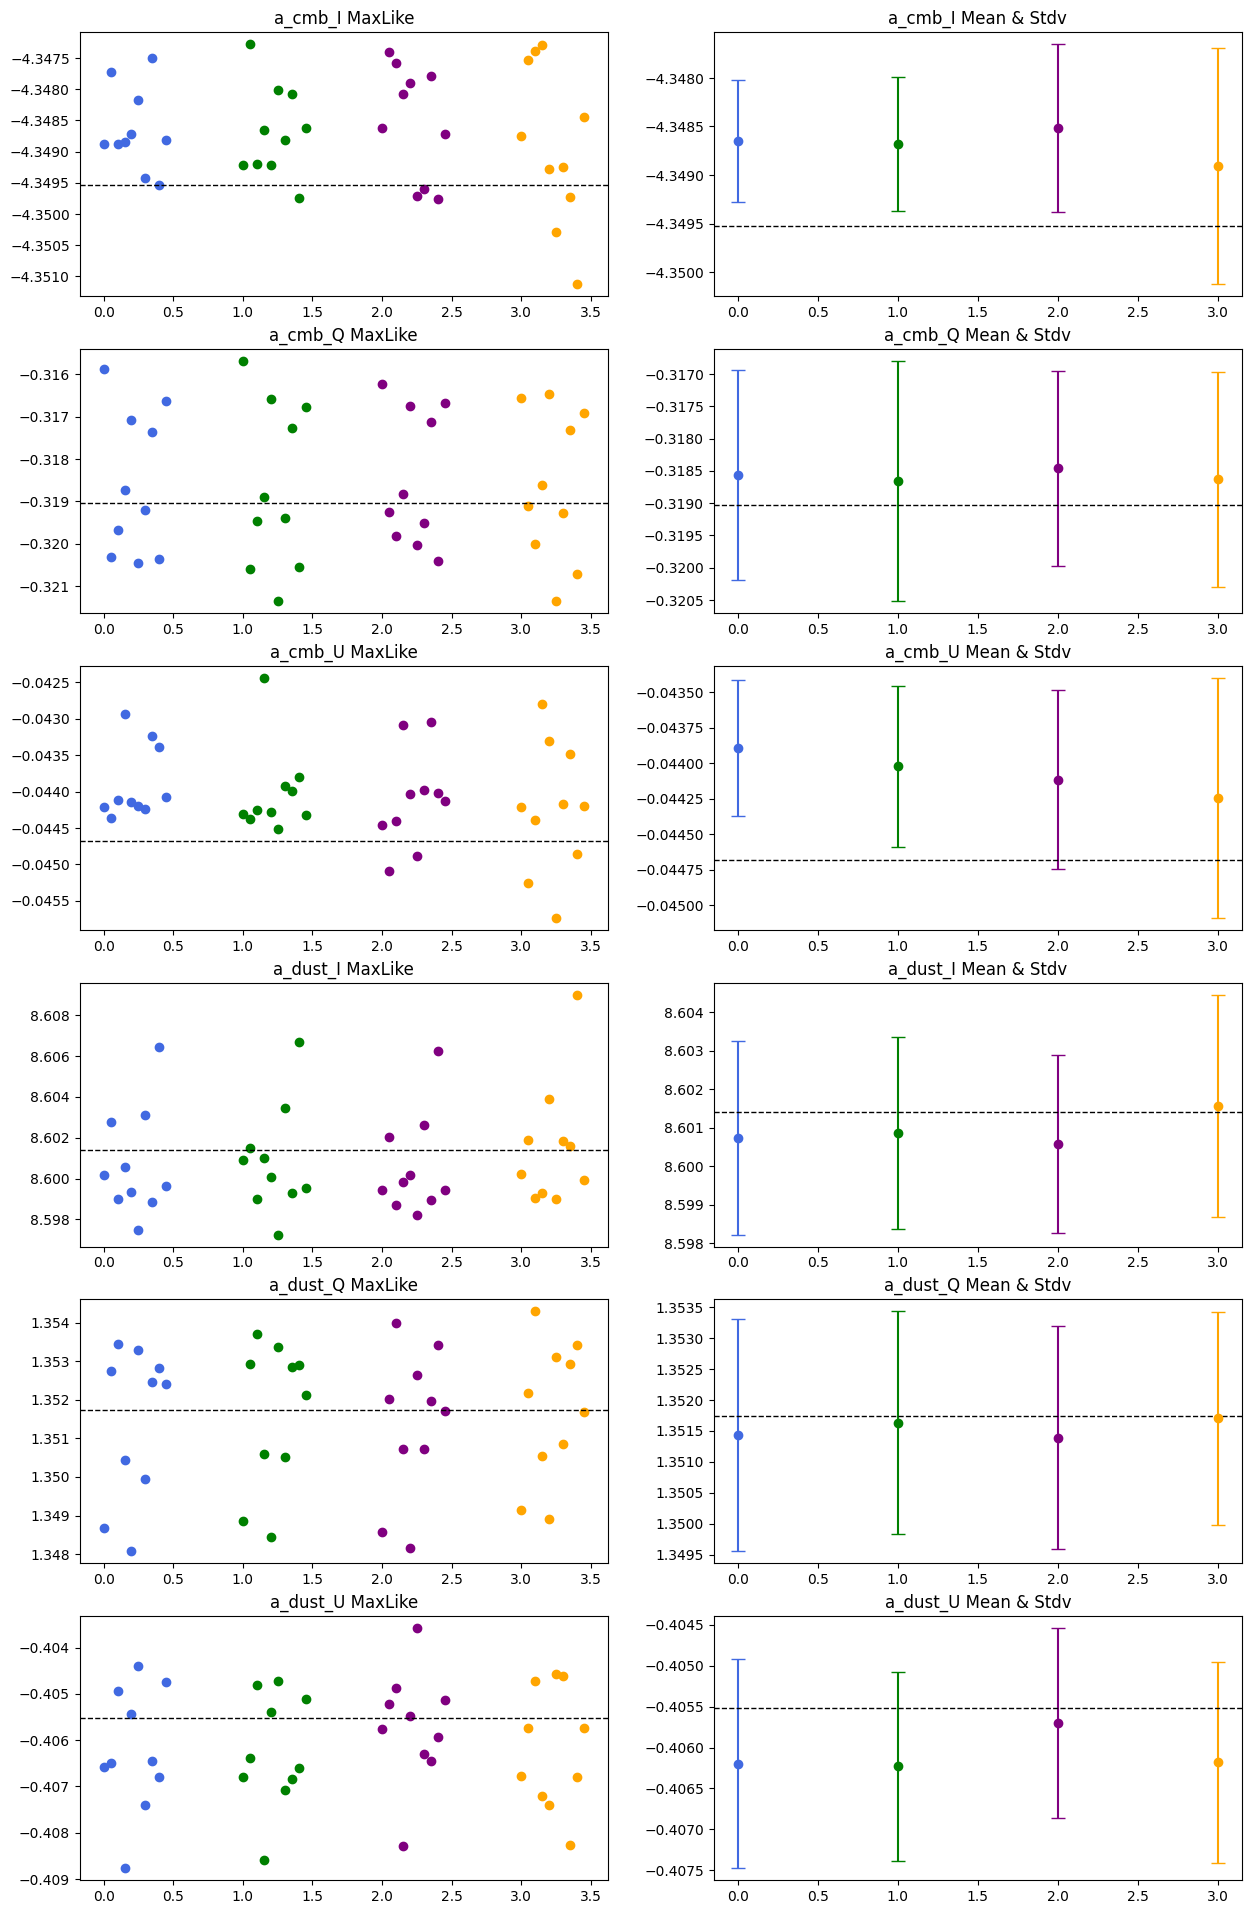

In [6]:
## LEFT: Analiytical maximum likelihood (see the 2nd part of the notebook) 
##       or each noise realization and covariance configuration
## RIGHT: Mean & stdv vs input value


ML_solutions = {
    'diag': [[-4.348884948200952,-0.31586311686705865,-0.04420894889424162,\
               8.600162773795564, 1.3486737096813632 ,-0.40658895638847975],
             [-4.347726425971318,-0.32032168912546594,-0.04436103837392502,\
               8.60276116455604,  1.3527428593980024, -0.4064889305400819],
             [-4.348882291060493,-0.319674463408904,-0.04412268333415989,\
               8.59899895417036,  1.353454843662443,-0.4049305022092837],
             [-4.348846054337958,-0.31872744848363355,-0.04293166986926211,\
               8.600551216723506, 1.3504282086187298, -0.4087671540011148],
             [-4.348723148325621,-0.317075925256759,-0.04414046518233286,\
               8.599340591121333, 1.3480688121363391,-0.4054278212503733],
             [-4.348164642441275,-0.3204667206758904,-0.04419516458181891,\
               8.59748574379135,  1.3533002985885043,-0.40439492572277685],
             [-4.349415778119904,-0.3191942017543766,-0.044241155741557237,\
               8.603132858894812, 1.3499509070893665,-0.40740955292997566],
             [-4.34749479272479,-0.3173509172541264,-0.04324321253127089,\
               8.598845972938285,1.3524562444340062,-0.40644182865812756],
             [-4.349531397967146,-0.32036297109949285,-0.04338508824563411,\
               8.60644513105054,  1.3528171874874435, -0.4068000903143141],
             [-4.348815916231658,-0.31662818178011215,-0.04407067494752037,\
               8.59963967452736,  1.3524149586851817, -0.40473587291434887]],
    'NU_dense': [[-4.349208113408224,-0.315685980238834,-0.04431199415562598,\
                   8.600912583013422,  1.3488664945110582, -0.4067883017680631],
                 [-4.347279093538058,-0.3206085941564448,-0.044373324295996275,\
                   8.601503917358224,  1.352933140105611, -0.40637648836303075],
                 [-4.34919474725583,-0.3194638955357001,-0.044254219090204105,\
                   8.598989724170321, 1.3536998764630148,-0.40480624839587087],
                 [-4.348657217399158,-0.31889449515433554,-0.04244136185411529,\
                   8.601011491464122, 1.3505844274482481,-0.40858639485090803],
                 [-4.349207644308892,-0.31659082187578813,-0.044276945022884595,\
                   8.600064925566224, 1.3484453795837383, -0.4053857697449386],
                 [-4.348017554188588,-0.32135576580194025,-0.04450848055660078,\
                   8.597250632058945, 1.353374357252856,  -0.40473005444205057],
                 [-4.348815641387543,-0.3193921606755986,-0.04391962025152085,\
                   8.603458346066606, 1.3505188107019663,-0.40707642278971334],
                 [-4.348081185111845,-0.3172592181252699,-0.0439952463929254,\
                   8.599279961278214, 1.3528492850949145,-0.40684022710879736],
                 [-4.3497410617128365,-0.3205496460163938,-0.04380118913452202,\
                   8.606677667417689,  1.3528943221938141,-0.40659235218084355],
                 [-4.3486216269816005,-0.31677893845175664,-0.04432477837125054,\
                   8.599557673860373,  1.3521191753052473, -0.40512109105128247]],
    'IQU_dense': [[-4.348625434193275,-0.3162161553910802,-0.04446419776516897,\
                    8.599460130405701, 1.3485710642257789,-0.405763375261293],
                  [-4.347398565509307,-0.31925965988822086,-0.04509631142968612,\
                    8.602050290737104, 1.3520131437288847, -0.405208313490414],
                  [-4.347577954930537,-0.319819090474027,-0.04440632831759045,\
                    8.598680516492053, 1.35399594389575, -0.404871369384949],
                  [-4.348082332271833,-0.3188302940701282,-0.04308176667339203,\
                    8.599831668485228, 1.3507272849524476,-0.408287741782825],
                  [-4.347897213525668,-0.31675436509219607,-0.044038600285794316,\
                    8.600195298955544, 1.348163851631054,  -0.405471755591343],
                  [-4.349705720318751,-0.3200353212384775,-0.044883707289781916,\
                    8.598238278418508, 1.3526344566677946,-0.403583292802965],
                  [-4.349602955744144,-0.31950182241999975,-0.04397598273994974,\
                    8.602624135163808, 1.3507191171550998, -0.406306007829743],
                  [-4.3477814969658555,-0.317128127644467,-0.043050345024313874,\
                    8.598957155779424,  1.3519699658534048,-0.40645886480233],
                  [-4.349756771029998,-0.32040387060570047,-0.044018775241714436,\
                    8.60625233884328,  1.353428263521715,  -0.40593647375691],
                  [-4.348719530077033,-0.31666521066919884,-0.04413353964829486,\
                    8.59944925192946,  1.3516983795608728, -0.405134734619052]],
    'IQU-NU_dense': [[-4.3487462279378,-0.31654820011863394,-0.04421212639317362,\
                       8.600220753837654,1.3491345836970445,-0.406771850363527],
                     [-4.347525214788383,-0.3191012462941136,-0.045260456145899575,\
                       8.60190588423355,  1.3521833131788372,-0.405739878389533],
                     [-4.347381418410956,-0.31999955794931206,-0.04439537828992135,\
                       8.599032162377249, 1.3542856655089894, -0.404726468889649],
                     [-4.347297641770706,-0.3186214943616006,-0.04280593093781704,\
                       8.599277038041638, 1.3505396824601241,-0.407199274125814],
                     [-4.349275197747909,-0.3164723117097888,-0.043314033994291457,\
                       8.603910150501664, 1.348908750374251, -0.407405318877577],
                     [-4.350291162577911,-0.3213528963941461,-0.04573343286299236,\
                       8.598992929670121, 1.353093922924066, -0.404562993406241],
                     [-4.349253903727779,-0.3192758065349547,-0.04417114309758885,\
                       8.601816002587627, 1.3508647877901145,-0.404620595067079],
                     [-4.349730603417062,-0.31731720810555775,-0.04348772401348722,\
                       8.601573461077509, 1.3529364235830192, -0.408254103532435],
                     [-4.351127632960615,-0.3207198924569521,-0.04485198032639026,\
                       8.609000129234943, 1.3534165461623844,-0.406785728998204],
                     [-4.34845225866507,-0.31692258429299613,-0.04420098332059297,\
                       8.599918477399957,1.3516746015964451, -0.40572853165578]]
}
colors = {'diag': 'royalblue', 'NU_dense': 'green', 'IQU_dense': 'purple', 'IQU-NU_dense': 'orange'}

fig,ax=plt.subplots(6,2,figsize=(15,24))  # Amplitudes only
for i in range(6):
    ax[i,0].set_title(PARS[i]+' MaxLike')
    ax[i,0].axhline(CHAINS['diag']['0']['true'][i],color='k',linestyle='--',linewidth=1)
    for c,config in enumerate(ML_solutions):
        MEAN, STDV = 0, 0
        reals = len(ML_solutions[config])
        for n in range(reals):
            ax[i,0].scatter(c+n/20,ML_solutions[config][n][i],color=colors[config],marker='o')
            MEAN += ML_solutions[config][n][i] / reals
        for n in range(reals):
            STDV += (ML_solutions[config][n][i]-MEAN)**2 / reals
        ax[i,1].errorbar(c,MEAN,yerr=np.sqrt(STDV),color=colors[config],marker='o',capsize=5)

    ax[i,1].set_title(PARS[i]+' Mean & Stdv')
    ax[i,1].axhline(CHAINS['diag']['0']['true'][i],color='k',linestyle='--',linewidth=1)  

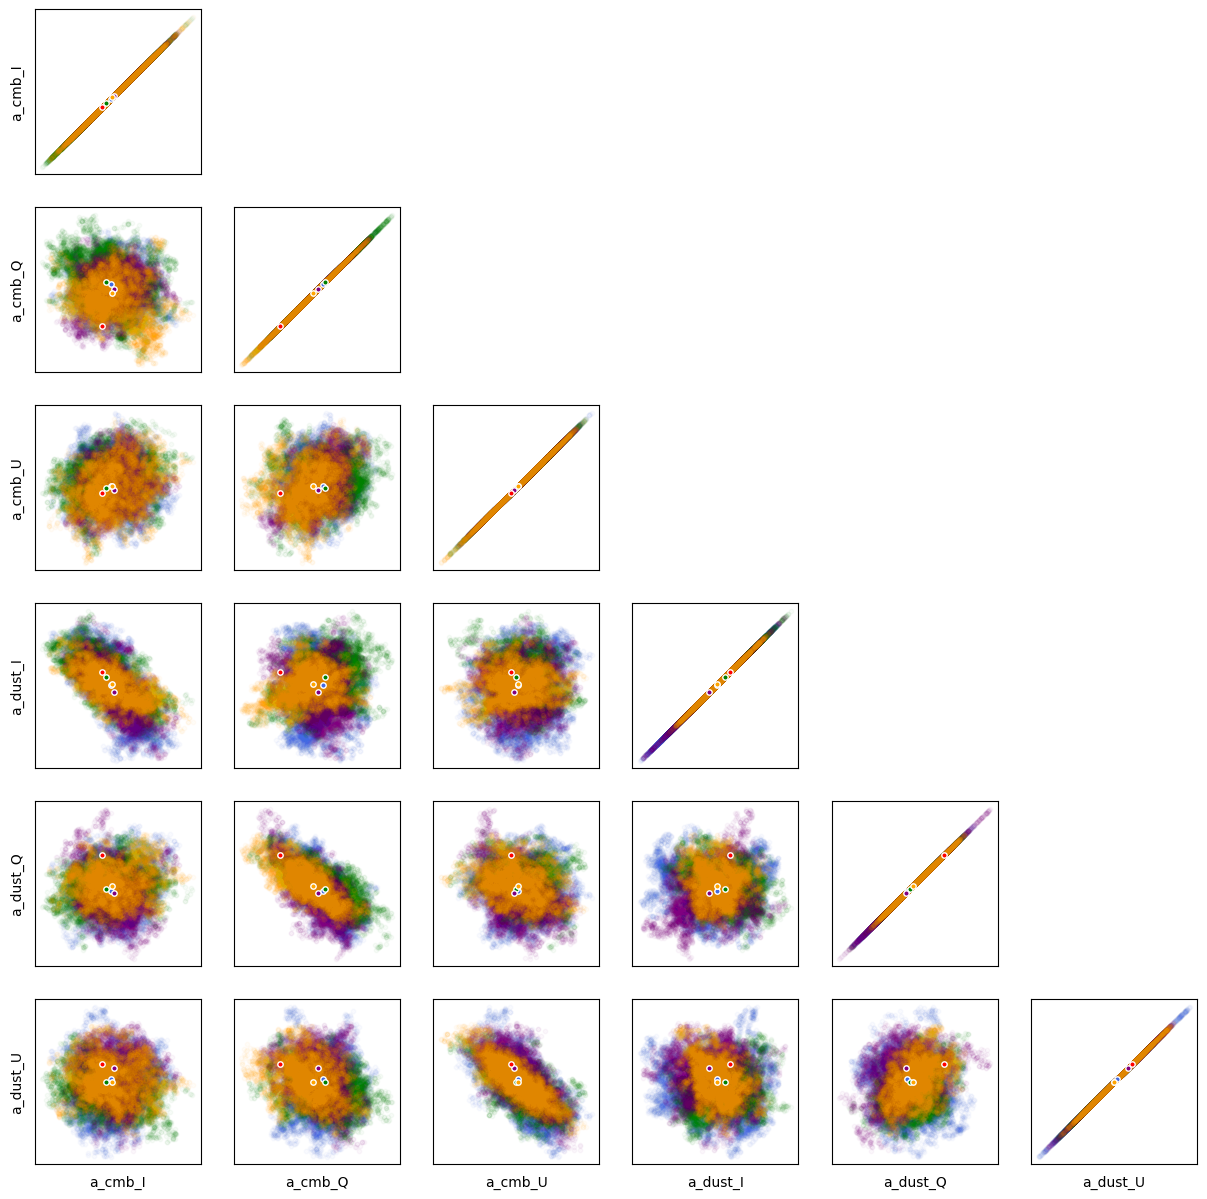

In [8]:
## All samples from all (5) chains. Red points are input values, other colored points are ML
## (for the first noise realization only)

npars = 6

fig, ax = plt.subplots(npars,npars, figsize=(15,15))
for i in range(npars):
    for j in range(npars):
        if i>=j:
            for c,config in enumerate(configs):
                for n in range(nchains):
                    ax[i,j].scatter(CHAINS[config][str(n)]['samples'][j*iterations+burn_in:(j+1)*iterations],\
                                    CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations], c=colors[config],s=10,alpha=0.03)
            for c,config in enumerate(configs):
                ax[i,j].scatter(ML_solutions[config][0][j],ML_solutions[config][0][i], c=colors[config], s=15, marker='o', edgecolor='white')
            ax[i,j].scatter(CHAINS[config][str(n)]['true'][j],CHAINS[config][str(n)]['true'][i], c='red', s=15, marker='o', edgecolor='white')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            if j==0:
                ax[i,j].set_ylabel(PARS[i])
            if i==npars-1:
                ax[i,j].set_xlabel(PARS[j])
        else:
            plt.delaxes(ax[i,j])
plt.show()

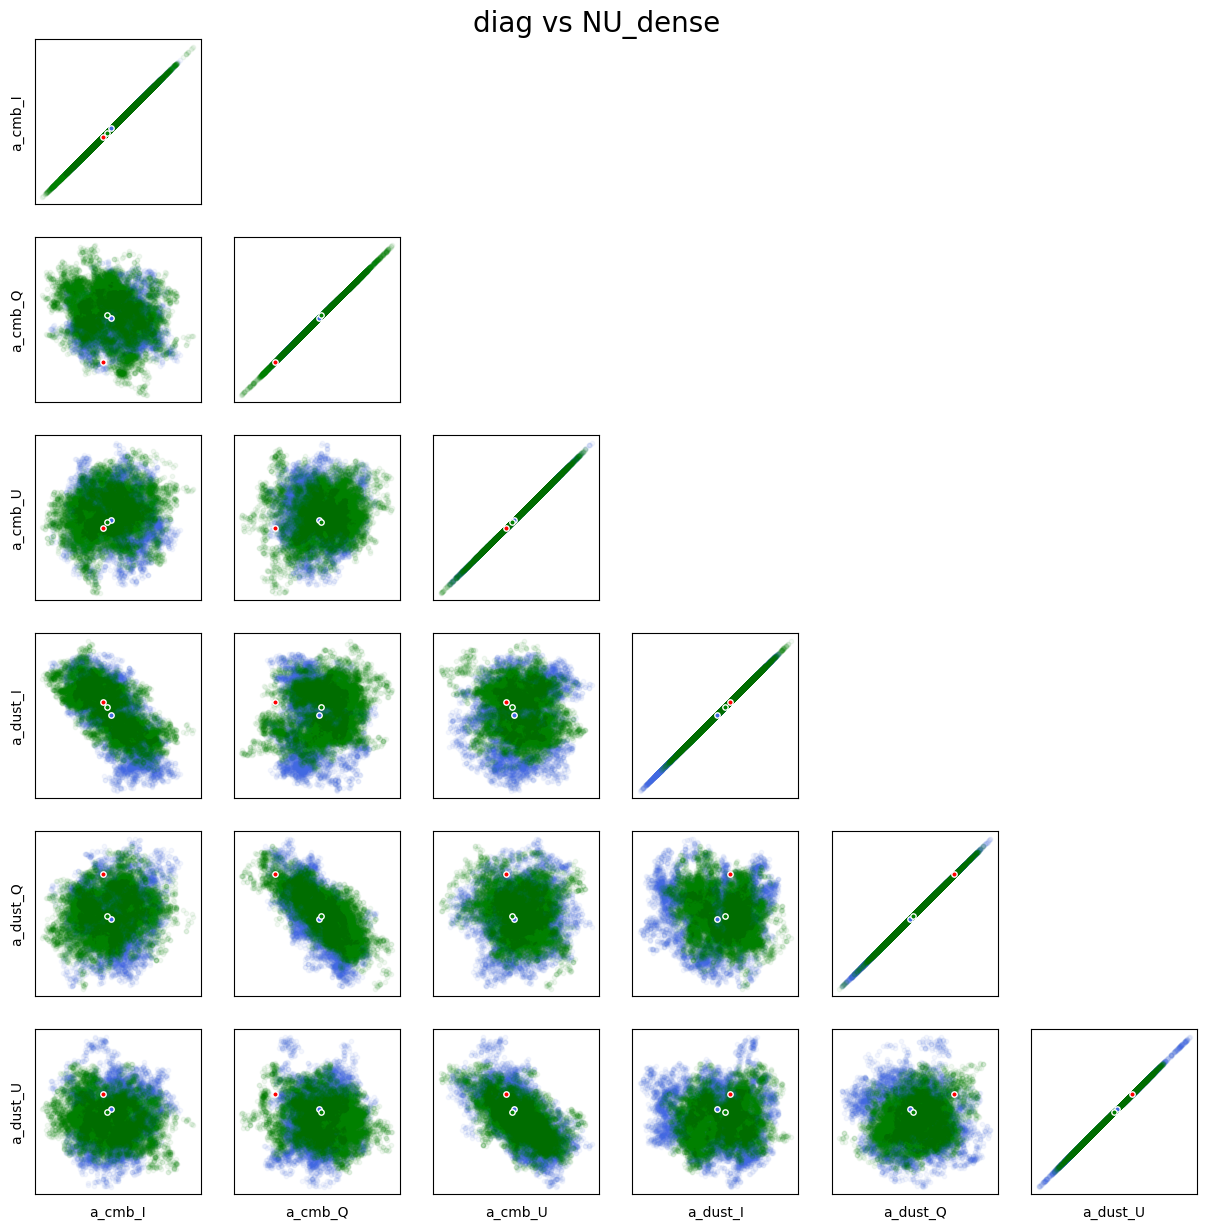

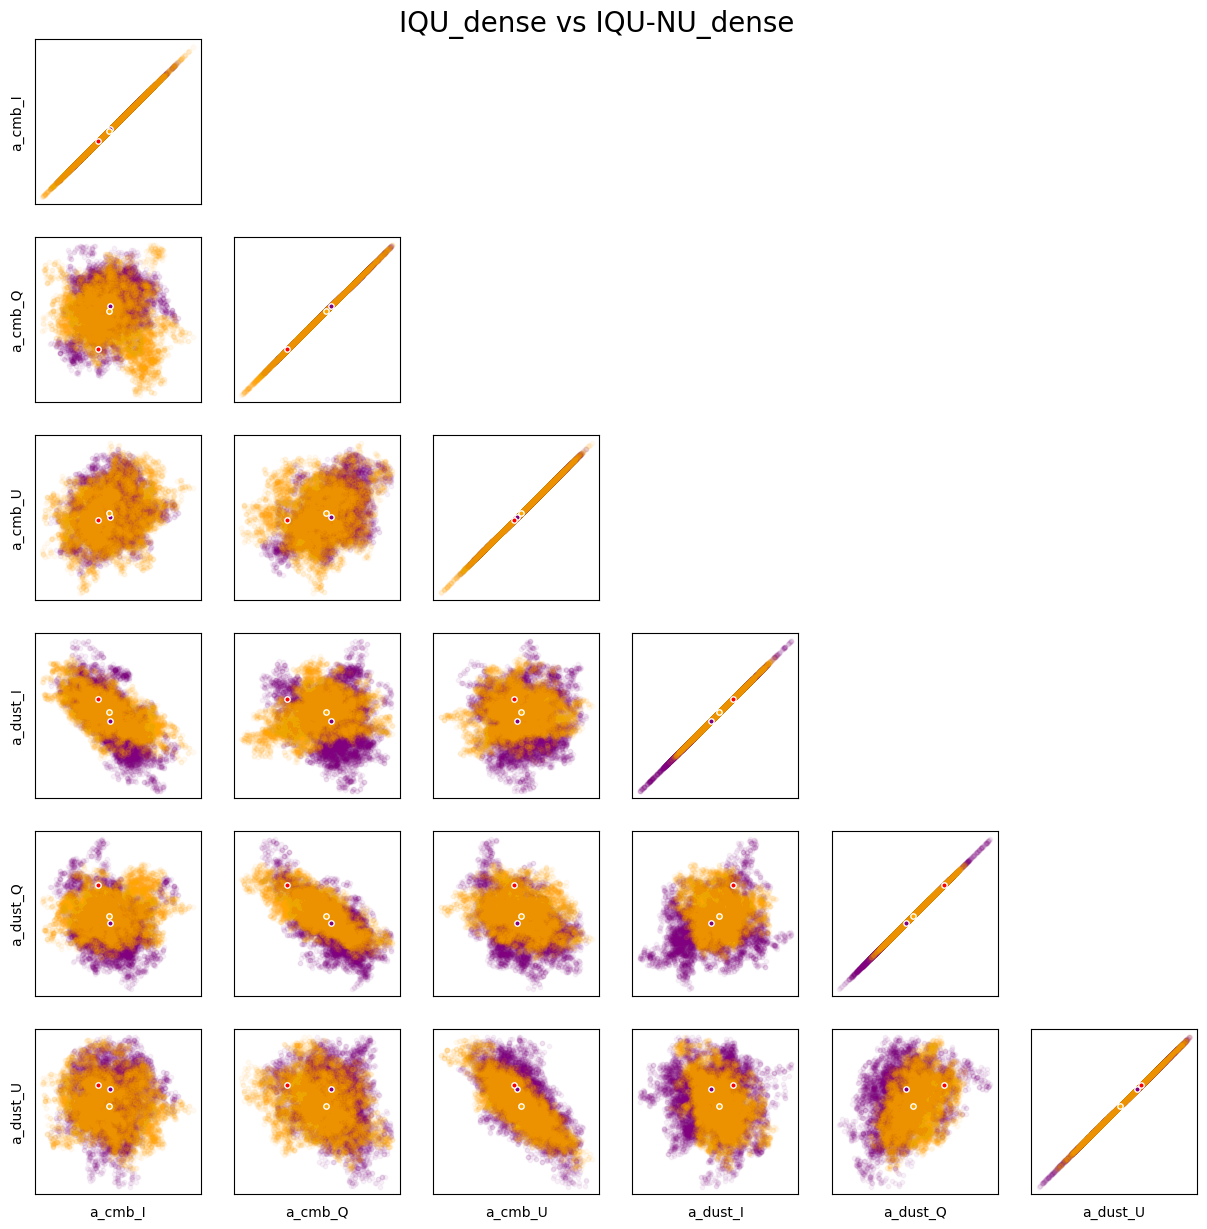

In [9]:
## Same plot but comparing a configuration with its NU_corr generalization

npars = 6
fig, ax = plt.subplots(npars,npars, figsize=(15,15))
plt.suptitle('diag vs NU_dense',y=0.9,fontsize=20)
for i in range(npars):
    for j in range(npars):
        if i>=j:
            for c,config in enumerate(configs[:2]):
                for n in range(nchains):
                    ax[i,j].scatter(CHAINS[config][str(n)]['samples'][j*iterations+burn_in:(j+1)*iterations],\
                                    CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations], c=colors[config],s=10,alpha=0.05)
            for c,config in enumerate(configs[:2]):
                ax[i,j].scatter(ML_solutions[config][0][j],ML_solutions[config][0][i], c=colors[config], s=15, marker='o', edgecolor='white')
            ax[i,j].scatter(CHAINS[config][str(n)]['true'][j],CHAINS[config][str(n)]['true'][i], c='red', s=15, marker='o', edgecolor='white')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            if j==0:
                ax[i,j].set_ylabel(PARS[i])
            if i==npars-1:
                ax[i,j].set_xlabel(PARS[j])
        else:
            plt.delaxes(ax[i,j])
plt.show()


fig, ax = plt.subplots(npars,npars, figsize=(15,15))
plt.suptitle('IQU_dense vs IQU-NU_dense',y=0.9, fontsize=20)
for i in range(npars):
    for j in range(npars):
        if i>=j:
            for c,config in enumerate(configs[2:]):
                for n in range(nchains):
                    ax[i,j].scatter(CHAINS[config][str(n)]['samples'][j*iterations+burn_in:(j+1)*iterations],\
                                    CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations], c=colors[config],s=10,alpha=0.05)
            for c,config in enumerate(configs[2:]):
                    ax[i,j].scatter(ML_solutions[config][0][j],ML_solutions[config][0][i], c=colors[config], s=15, marker='o', edgecolor='white')
            ax[i,j].scatter(CHAINS[config][str(n)]['true'][j],CHAINS[config][str(n)]['true'][i], c='red', s=15, marker='o', edgecolor='white')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            if j==0:
                ax[i,j].set_ylabel(PARS[i])
            if i==npars-1:
                ax[i,j].set_xlabel(PARS[j])
        else:
            plt.delaxes(ax[i,j])
plt.show()

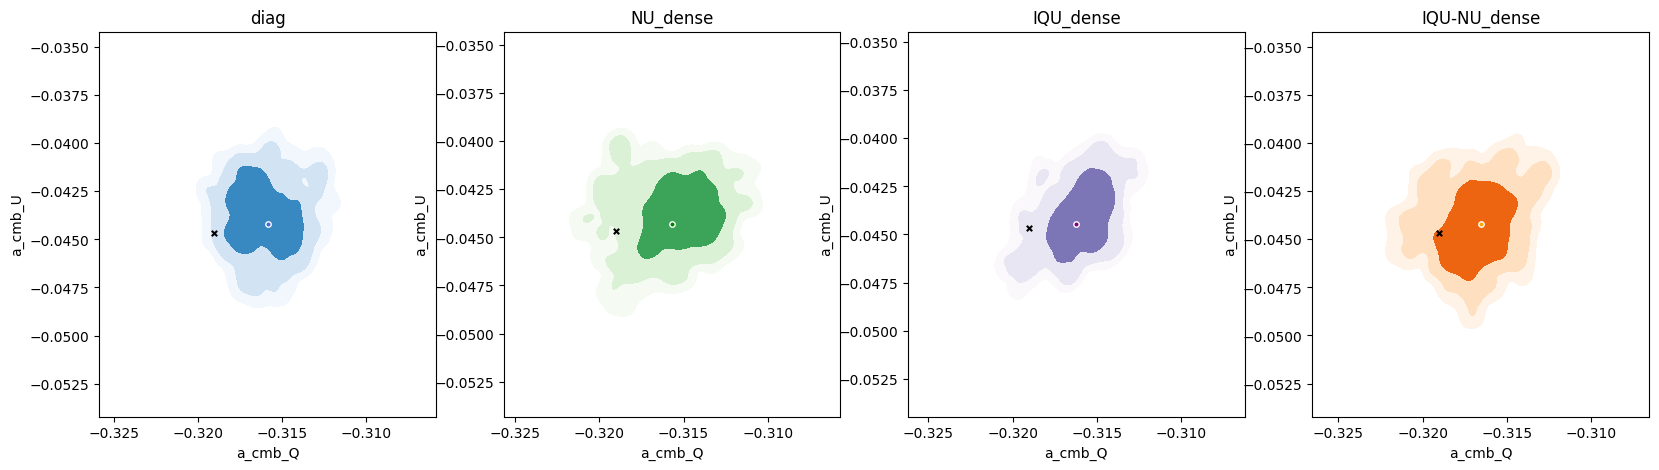

In [10]:
## Joint distribution of two given parameters for each configuration

par1_ind, par2_ind = 1,2  ## choose which parameters to plot

fig, ax = plt.subplots(1,len(configs),figsize=(5*len(configs),5))
cmap_colors = {'diag': 'Blues','NU_dense': 'Greens','IQU_dense': 'Purples','IQU-NU_dense': 'Oranges'}

for c,config in enumerate(configs):
    full_samples1, full_samples2 = np.empty((iterations-burn_in)*5), np.empty((iterations-burn_in)*5)
    for i in range(nchains):
        full_samples1[i*(iterations-burn_in):(i+1)*(iterations-burn_in)] = CHAINS[config][str(i)]['samples'][par1_ind*iterations+burn_in:(par1_ind+1)*iterations]
        full_samples2[i*(iterations-burn_in):(i+1)*(iterations-burn_in)] = CHAINS[config][str(i)]['samples'][par2_ind*iterations+burn_in:(par2_ind+1)*iterations]
    
    d = {CHAINS[config]['0']['pars'][par1_ind]:full_samples1, CHAINS[config]['0']['pars'][par2_ind]:full_samples2}
    dat = pd.DataFrame(data=d)
    lev=[1-0.996,1-0.954,1-0.682,1]
    plt.axes(ax[c])
    sb.kdeplot(data=dat,x=CHAINS[config]['0']['pars'][par1_ind],y=CHAINS[config]['0']['pars'][par2_ind],cmap=cmap_colors[config], fill=True,cbar=False,levels=lev)
    ax[c].scatter(ML_solutions[config][0][par1_ind],ML_solutions[config][0][par2_ind], c=colors[config], s=15, marker='o', edgecolor='white')
    ax[c].scatter(CHAINS[config]['0']['true'][par1_ind],CHAINS[config]['0']['true'][par2_ind], c='k', s=15, marker='x')
    
    ax[c].set_xlim(ML_solutions[config][0][par1_ind]-0.01,\
                   ML_solutions[config][0][par1_ind]+0.01)
    ax[c].set_ylim(ML_solutions[config][0][par2_ind]-0.01,\
                   ML_solutions[config][0][par2_ind]+0.01)
    ax[c].set_title(config)
    

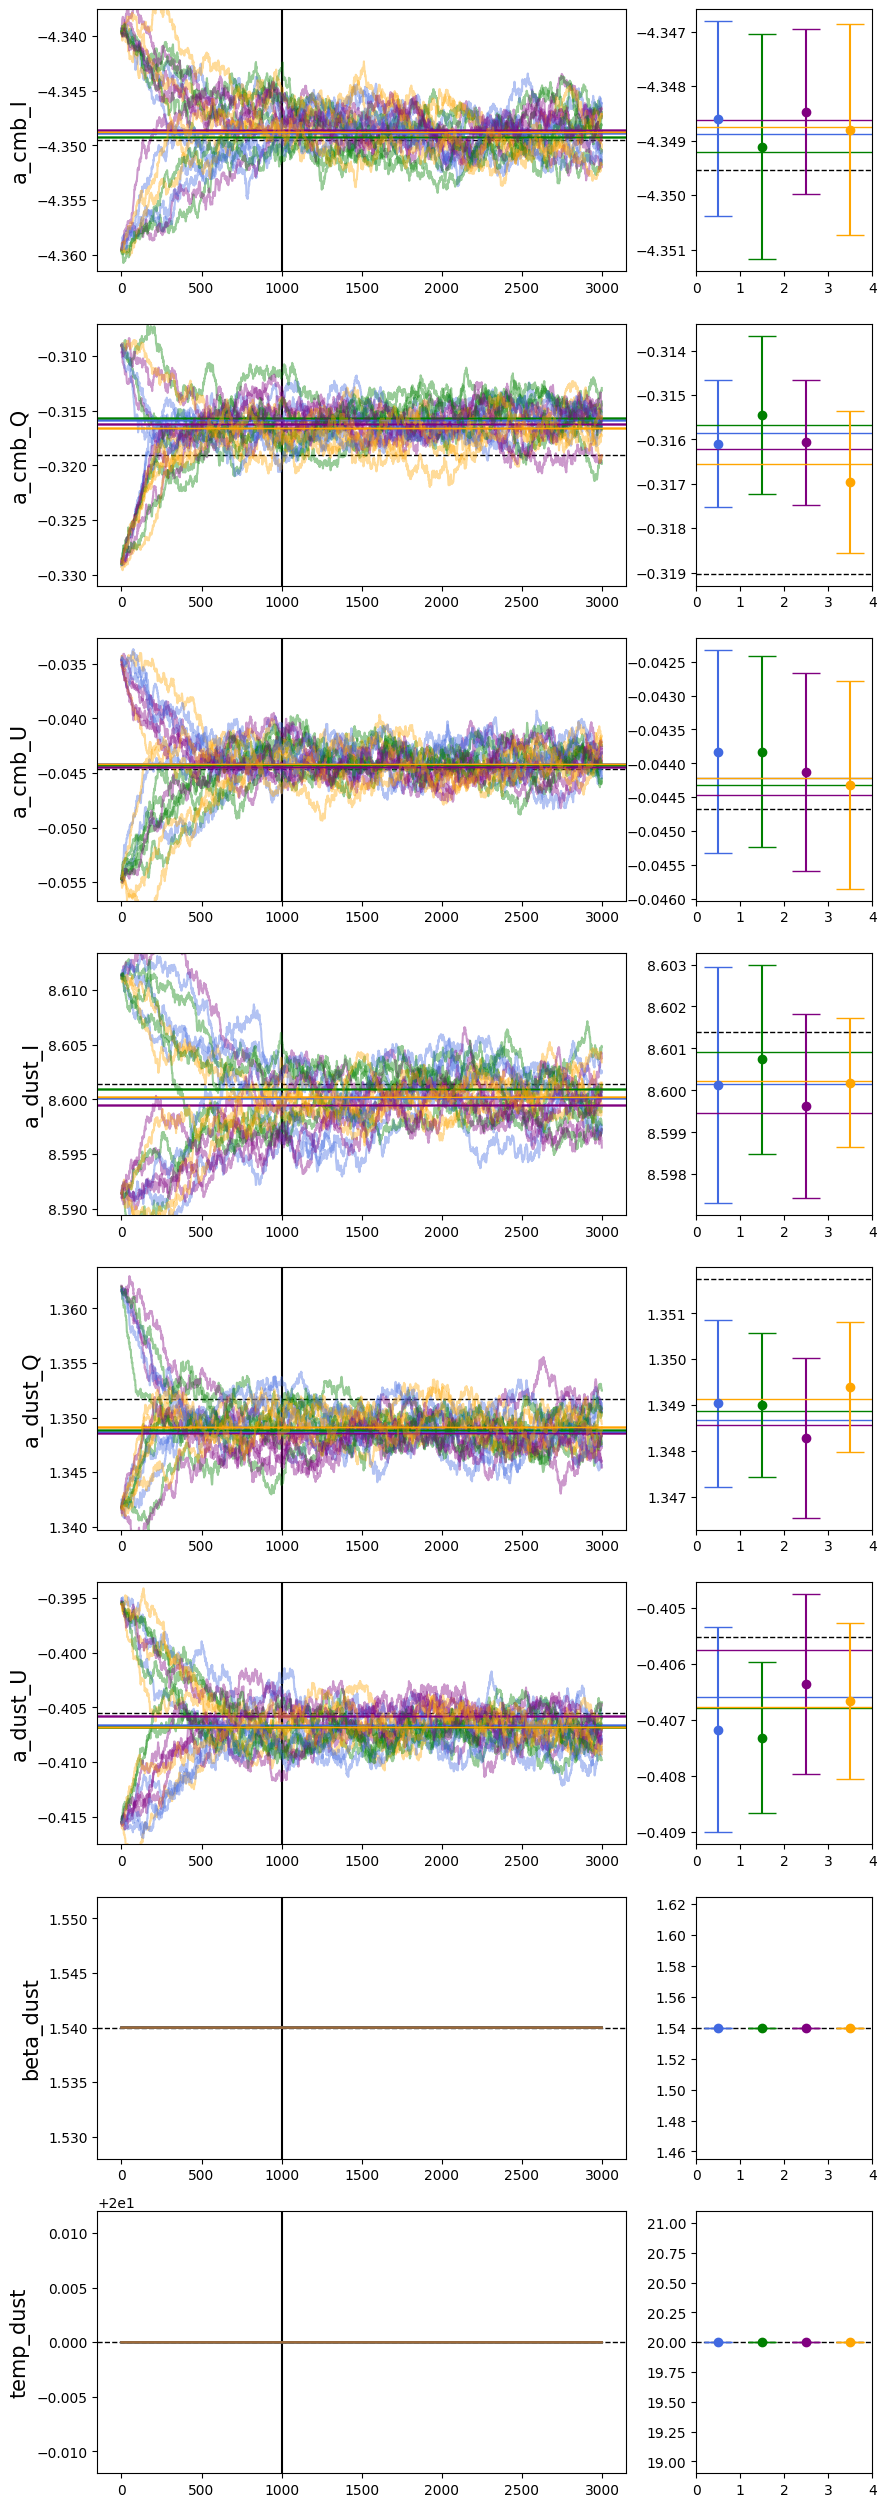

In [11]:
## LEFT: Overplot of all chains for all configurations 
## RIGHT: Mean & stdv vs maximum likelihood

FULL_SAMPLES = np.empty((len(configs),(iterations-burn_in)*nchains))
fig, ax = plt.subplots(len(PARS),2, figsize=(10,4*len(PARS)),gridspec_kw={'width_ratios': [3, 1]})

for i,par in enumerate(PARS):
    # Chains
    ax[i,0].axhline(CHAINS['diag']['0']['true'][i],color='k',linestyle='--',linewidth=1)
    ax[i,0].axvline(burn_in,color='k')
    for n in range(nchains):
        for c,config in enumerate(configs): 
            if i<6:
                ax[i,0].axhline(ML_solutions[config][0][i],color=colors[config],linestyle='-',linewidth=1)
            ax[i,0].plot(np.arange(iterations),CHAINS[config][str(n)]['samples'][i*iterations:(i+1)*iterations],color=colors[config],alpha=0.4)
            FULL_SAMPLES[c,n*(iterations-burn_in):(n+1)*(iterations-burn_in)] = CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations]
    ax[i,0].set_ylabel(PARS[i], fontsize=15)
    ax[i,0].set_ylim(CHAINS['diag']['0']['true'][i]-0.012,CHAINS['diag']['0']['true'][i]+0.012)
    
    # Full mean & stdv
    ax[i,1].axhline(CHAINS['diag']['0']['true'][i],color='k',linestyle='--',linewidth=1)
    for c,config in enumerate(configs):
        if i<6:
            ax[i,1].axhline(ML_solutions[config][0][i],color=colors[config],linestyle='-',linewidth=1)
        ax[i,1].errorbar(c+0.5,np.mean(FULL_SAMPLES[c,:]),yerr=np.std(FULL_SAMPLES[c,:]),color=colors[config],capsize=10,marker='o')
    ax[i,1].set_xlim(0,len(configs))
    
_ = plt.show()

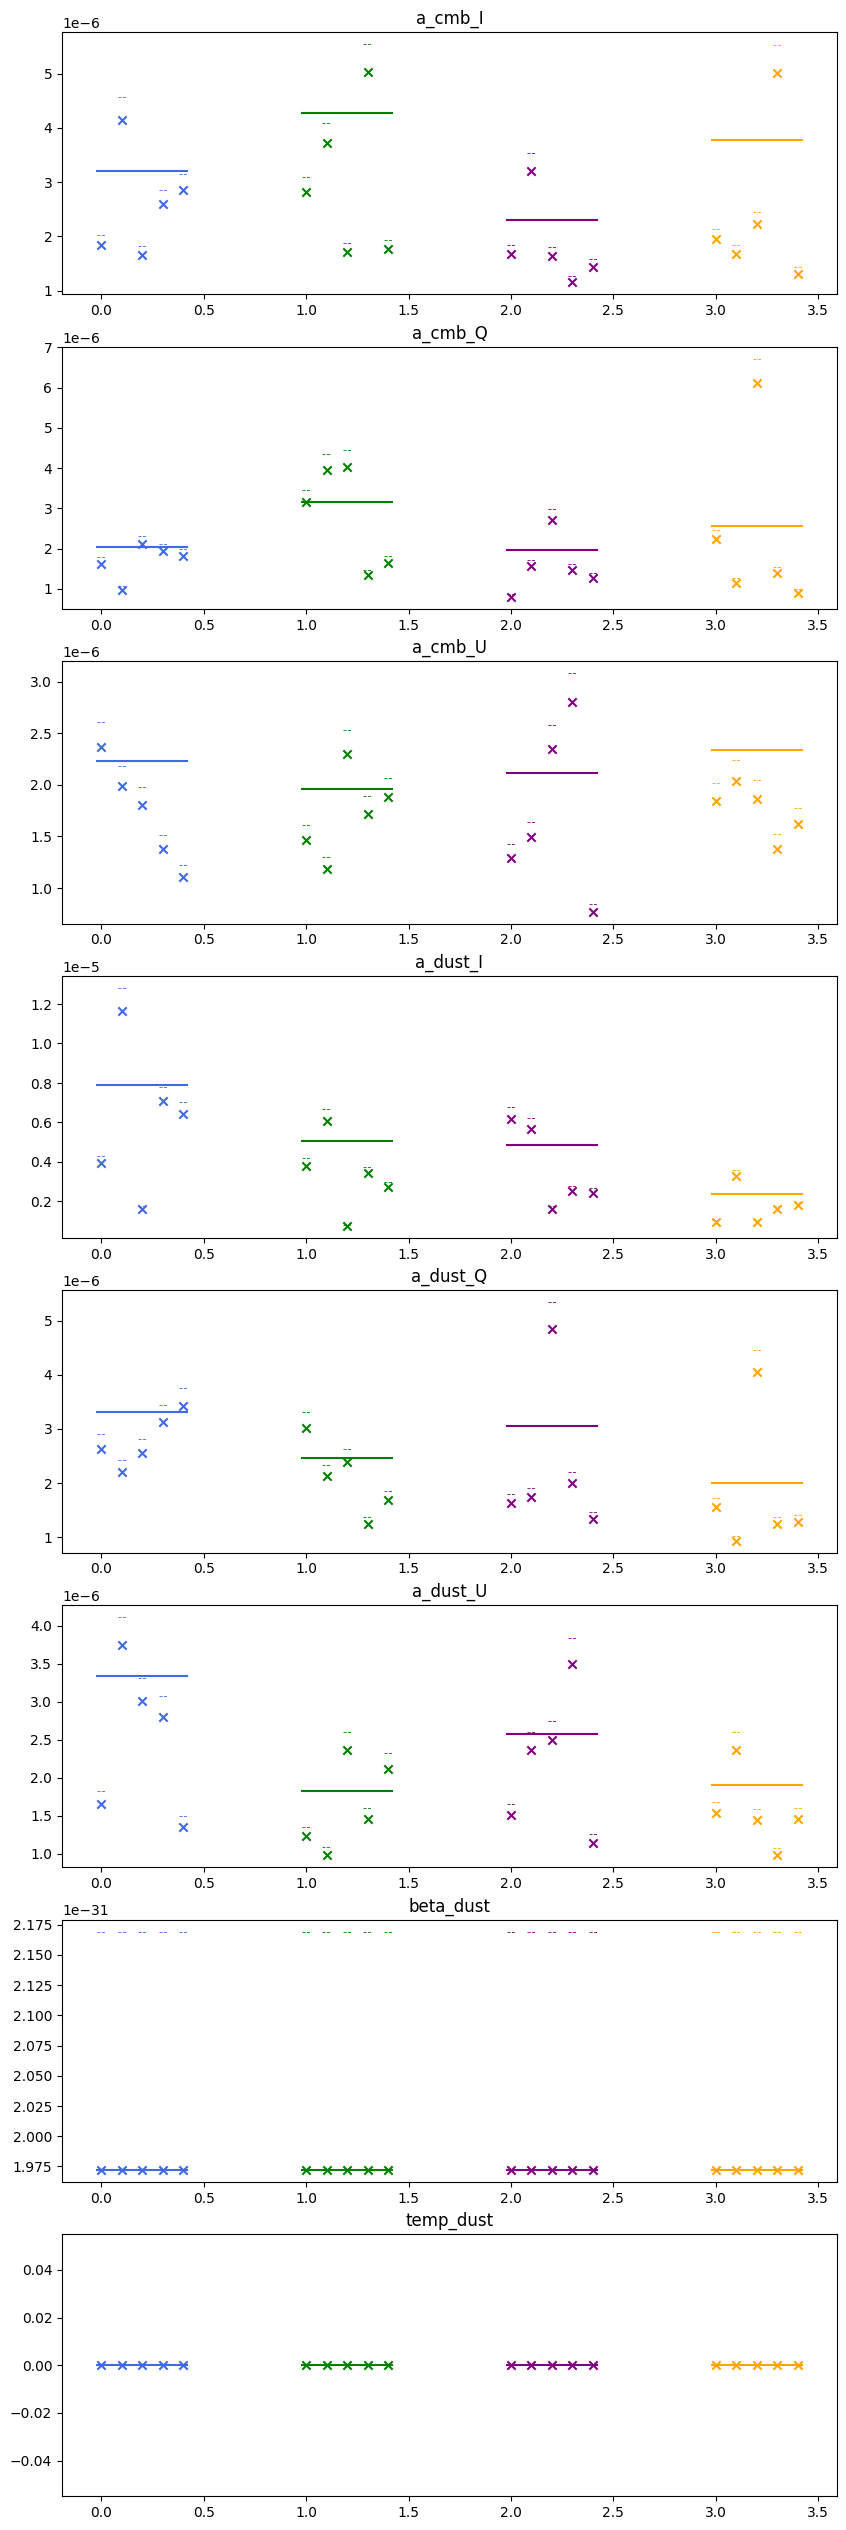

In [12]:
## Naive check on variances for convergence criterion


FULL_SAMPLES = np.empty((iterations-burn_in)*5)
fig, ax = plt.subplots(len(PARS), figsize=(10,4*len(PARS)))

for i,par in enumerate(PARS):
    for c,config in enumerate(configs):
        for n in range(nchains):
            FULL_SAMPLES[n*(iterations-burn_in):(n+1)*(iterations-burn_in)] = CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations]
            single_var = np.var(CHAINS[config][str(n)]['samples'][i*iterations+burn_in:(i+1)*iterations])
            ax[i].scatter(c+n/10,single_var,color=colors[config],marker='x')
            ax[i].plot([c+n/10-0.02,c+n/10+0.02],[single_var*1.1]*2,color=colors[config],linestyle='--',linewidth=0.6)
        ax[i].plot([c-0.02,c+n/10+0.02],[np.var(FULL_SAMPLES)]*2,color=colors[config])
        ax[i].set_title(par)
        


# Analytical maximum of the Likelihood

**MCMC Matrix building**

In [43]:
import scipy.linalg as la

In [44]:
def build_mcmc_covs(nus,npix,path_in,pix_dense=False,IQU_dense=False,nu_dense=False):
    nus = [float(x)*1e9 for x in nus]
    mcmc_full_cov = np.zeros((3*npix*len(nus),3*npix*len(nus)))
    subcov_names = []
    for i,f1 in enumerate(nus):
        for j,f2 in enumerate(nus):
            if str(f2)+'_'+str(f1) in subcov_names:
                continue
            
            mcmc_subcov = np.zeros((3*npix,3*npix))
            covname = str(f1)+'_'+str(f2)
            subcov_names.append(covname)
            if f1!=f2 and not nu_dense:
                pass
            else:
                filename = path_in+'TRUE_cov_'+covname+'.txt'
                stream = open(filename,'r')
                text = stream.readlines()
                stream.close()
                mcmc_subcov = []
                for line in text:
                    mcmc_subcov.append([float(el) for el in line[:-1].split('\t')])
                mcmc_subcov = np.array(mcmc_subcov)
                if not IQU_dense:
                    for k in range(3):
                        if k==0:
                            mcmc_subcov[:npix,npix:] *= 0
                        if k==1:
                            mcmc_subcov[npix:2*npix,:npix] *= 0
                            mcmc_subcov[npix:2*npix,2*npix:3*npix] *= 0
                        if k==2:
                            mcmc_subcov[2*npix:3*npix,:2*npix] *= 0
                if not pix_dense:
                    for k1 in range(3):
                        for k2 in range(3):
                            for p1 in range(npix):
                                for p2 in range(npix):
                                    if p1!=p2:
                                        mcmc_subcov[k1*npix+p1,k2*npix+p2]=0
            
            mcmc_full_cov[3*npix*i:3*npix*(i+1),3*npix*j:3*npix*(j+1)] = mcmc_subcov.copy()
            if j!=i:
                mcmc_full_cov[3*npix*j:3*npix*(j+1),3*npix*i:3*npix*(i+1)] = mcmc_subcov.copy()
    
    if mcmc_full_cov.any()==0:
        mcmc_inv_cov = mcmc_full_cov.copy()
    else:
        mcmc_inv_cov = la.inv(mcmc_full_cov.copy())
    
    inv_subcovs = {}
    for i,f1 in enumerate(nus):
        for j,f2 in enumerate(nus):
            if str(f1)+'_'+str(f2) not in subcov_names:
                continue
    
            inv_subcovs[str(f1)+'_'+str(f2)] = mcmc_inv_cov[3*npix*i:3*npix*(i+1),3*npix*j:3*npix*(j+1)].copy()
    return inv_subcovs

**Computing maximum**

In [45]:
import sympy
import healpy as hp

In [47]:
# Signals and mixing matrices at each frequency

sigs, mixmat = np.zeros((9,3)), np.zeros(9)
with open('runs/input_parameters.json','r') as filename:
    f = filename.read().split('\n')

    
N_real = '1'
for i,nu in enumerate([20.,30.,40.,85.,95.,145.,155.,220.,270.]):
    S = hp.read_map('runs/REAL_+'N_real'+/signal_map_'+str(nu*1e9)+'.fits',field=None)
    for p,v in enumerate(S[0]):
        if v != 0:
            sigs[i,:] = np.array([S[0][p],S[1][p],S[2][p]])
            break

    for j,line in enumerate(f):
        if line == '    "dust_I_'+str(nu*1e9)+'": [':
            mixmat[i] = float(f[j+1][8:-1])/CHAINS['diag']['0']['true'][3]

sigs, mixmat

(array([[-4.15360477e+00, -2.55730321e-01, -2.71312410e-02],
        [-3.90937089e+00, -2.52417087e-01, -7.01560481e-02],
        [-3.67027227e+00, -2.01957971e-01, -8.89997892e-02],
        [-2.01470067e+00,  5.08860442e-02, -1.54166545e-01],
        [-1.48148693e+00,  1.33954551e-01, -1.79896904e-01],
        [ 2.53895662e+00,  7.61894778e-01, -3.68874621e-01],
        [ 3.74819269e+00,  9.51160174e-01, -4.27330471e-01],
        [ 1.75717045e+01,  3.13752884e+00, -1.08693341e+00],
        [ 4.15716417e+01,  6.87656437e+00, -2.20819954e+00]]),
 array([0.02655485, 0.05072994, 0.07954857, 0.27151965, 0.33343027,
        0.80071351, 0.94075277, 2.54908715, 5.34148792]))

In [72]:
# Symbols definition

sym = ''
for par in PARS[:-2]:
    sym += par + ' '
    
x = sympy.symbols(sym, real=True)
x

(a_cmb_I, a_cmb_Q, a_cmb_U, a_dust_I, a_dust_Q, a_dust_U)

**DIAGONAL CASE**

In [73]:
# Covariance generation (approximation of the covariance used in map making)

inv_subcovs = build_mcmc_covs(nus       = [20,30,40,85,95,145,155,220,270],\
                              npix      = 2,\
                              path_in   = 'runs/',\
                              pix_dense = False, IQU_dense = False, nu_dense = False)

In [74]:
sigmas = np.zeros((3,9))
i = 0
for names in inv_subcovs:
    if names.split('_')[0] == names.split('_')[1]:
        sigmas[0,i] = inv_subcovs[names][0,0]
        sigmas[1,i] = inv_subcovs[names][2,2]
        sigmas[2,i] = inv_subcovs[names][4,4]
        i+=1

sigmas

array([[  2901.63742019,   9016.94320766,   5625.67101174,
        193601.31056899, 249327.98499108,  52204.96742988,
         45648.27498877,   7667.94426116,   2609.23103331],
       [  3543.98125679,  10882.57934445,   6785.28575824,
        230816.88462987, 297328.00920084, 124397.01241587,
        108363.61970449,  18245.64600396,   6197.59436301],
       [  3543.98125679,  10882.57934445,   6785.28575824,
        230816.88462987, 297328.00920084, 124397.01241587,
        108363.61970449,  18245.64600396,   6197.59436301]])

In [131]:
# Solving

as_cmb, as_dust = [], []
for k in range(3):
    CHISQ = 0
    for i in range(9):
        chi_i = (sigs[i,k] - x[k] - x[3+k]*mixmat[i])**2 * sigmas[k,i]
        CHISQ += chi_i
        
    Diff1 = sympy.diff(CHISQ,x[k])
    Diff2 = sympy.diff(CHISQ,x[3+k])
    [sol1] = sympy.solve(Diff1,dict=True)
    [sol2] = sympy.solve(Diff2,dict=True)
    print(sol1)
    print(sol2)
    
    a_dust = float(sympy.Eq(sol1[x[k]],sol2[x[k]]).simplify().rhs)
    as_dust.append(a_dust)
    print(a_dust,CHAINS['diag']['0']['true'][3+k])
    a_cmb = float(sol1[x[k]].subs(x[3+k],a_dust))
    as_cmb.append(a_cmb)
    print(a_cmb,CHAINS['diag']['0']['true'][k])
    print('\n')

## Format to collect
print('\n\n')
as_cmb, as_dust    

{a_cmb_I: -0.448309306474513*a_dust_I - 0.493517417813589}
{a_cmb_I: 3.75433549563551 - 0.94226638772659*a_dust_I}
8.59963967452736 8.601402282714846
-4.348815916231658 -4.349530560149654


{a_cmb_Q: 0.428123847831351 - 0.5506830760993*a_dust_Q}
{a_cmb_Q: 1.27033446052489 - 1.17342878538392*a_dust_Q}
1.3524149586851817 1.351739645004273
-0.31662818178011215 -0.31903418384973736


{a_cmb_U: -0.5506830760993*a_dust_U - 0.266951870451729}
{a_cmb_U: -1.17342878538392*a_dust_U - 0.518999398702706}
-0.40473587291434887 -0.40551581978797924
-0.04407067494752037 -0.04467950547083019







([-4.348815916231658, -0.31662818178011215, -0.04407067494752037],
 [8.59963967452736, 1.3524149586851817, -0.40473587291434887])

**IQU DENSE CASE** 

In [132]:
# Covariance generation (approximation of the covariance used in map making)

inv_subcovs = build_mcmc_covs(nus       = [20,30,40,85,95,145,155,220,270],\
                              npix      = 2,\
                              path_in   = 'runs/',\
                              pix_dense = False, IQU_dense = True, nu_dense = False)

In [133]:
sigmas = np.zeros(((3,3,9)))
i = 0
for names in inv_subcovs:
    if names.split('_')[0] == names.split('_')[1]:
        for k in range(3):
            sigmas[0,k,i] = inv_subcovs[names][0,2*k]
            sigmas[1,k,i] = inv_subcovs[names][2,2*k]
            sigmas[2,k,i] = inv_subcovs[names][4,2*k]
        i+=1

sigmas

array([[[   3368.08822074,   10428.19741067,    6542.66267986,
          260704.38828962,  290015.80795181,   70037.86681355,
           52917.86479778,    8924.35752143,    3517.26493725],
        [    883.11317436,   -2635.53563434,    1673.81347834,
          121456.6383136 ,  -73550.05289092,   46315.94257838,
          -18893.67677355,   -3197.80054834,   -2333.05090704],
        [    833.08460699,   -2593.29506824,   -1670.31723796,
         -122116.37509191,  -73671.59698566,  -45719.67109731,
           18471.46550176,    3214.64963686,    2342.63097507]],

       [[    883.11317436,   -2635.53563434,    1673.81347834,
          121456.6383136 ,  -73550.05289092,   46315.94257838,
          -18893.67677355,   -3197.80054834,   -2333.05090704],
        [   4132.163396  ,   12619.05411226,    7856.09037698,
          309714.61758703,  345061.95353116,  167091.52217595,
          126474.1788259 ,   21165.59869693,    8385.44718836],
        [   -961.00307562,   -2921.51242554,    

In [134]:
# Solving

CHISQ = 0
for i in range(9):
    chi_i = 0
    for k in range(3):
        chi_k = 0
        for k2 in range(3):
            chi_k += (sigs[i,k2] - x[k2] - x[3+k2]*mixmat[i]) * sigmas[k,k2,i]
        chi_k *= (sigs[i,k] - x[k] - x[3+k]*mixmat[i])
        chi_i += chi_k
    CHISQ += chi_i

        
sol, sol1, sol2, sol3, sol4 = [], [], [], [], []
for var in x:
    Eq = sympy.diff(CHISQ,var)
    sol.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol)-1):
    Eq = sympy.Eq(sol[i][x[0]],sol[i+1][x[0]]).simplify()
    sol1.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol1)-1):
    Eq = sympy.Eq(sol1[i][x[1]],sol1[i+1][x[1]]).simplify()
    sol2.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol2)-1):
    Eq = sympy.Eq(sol2[i][x[2]],sol2[i+1][x[2]]).simplify()
    sol3.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol3)-1):
    Eq = sympy.Eq(sol3[i][x[3]],sol3[i+1][x[3]]).simplify()
    sol4.append(sympy.solve(Eq,dict=True)[0])
    
Eq = sympy.Eq(sol4[0][x[4]],sol4[1][x[4]]).simplify()
[sol5] = sympy.solve(Eq,dict=True)
    
amp1 = float(sol5[x[5]])
print(amp1,CHAINS['diag']['0']['true'][5])

amp2 = float(sol4[0][x[4]].subs(x[5],amp1))
print(amp2,CHAINS['diag']['0']['true'][4])

amp3 = float(sol3[0][x[3]].subs(x[5],amp1).subs(x[4],amp2))
print(amp3,CHAINS['diag']['0']['true'][3])

amp4 = float(sol2[0][x[2]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3))
print(amp4,CHAINS['diag']['0']['true'][2])

amp5 = float(sol1[0][x[1]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3).subs(x[2],amp4))
print(amp5,CHAINS['diag']['0']['true'][1])

amp6 = float(sol[0][x[0]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3).subs(x[2],amp4).subs(x[1],amp5))
print(amp6,CHAINS['diag']['0']['true'][0])

## Format to collect
print('\n\n')
[amp6,amp5,amp4,amp3,amp2,amp1]

-0.405134734619052 -0.40551581978797924
1.3516983795608728 1.351739645004273
8.59944925192946 8.601402282714846
-0.04413353964829486 -0.04467950547083019
-0.31666521066919884 -0.31903418384973736
-4.348719530077033 -4.349530560149654





[-4.348719530077033,
 -0.31666521066919884,
 -0.04413353964829486,
 8.59944925192946,
 1.3516983795608728,
 -0.405134734619052]

**NU DENSE**

In [135]:
# Covariance generation (approximation of the covariance used in map making)

inv_subcovs = build_mcmc_covs(nus       = [20,30,40,85,95,145,155,220,270],\
                              npix      = 2,\
                              path_in   = 'runs/',\
                              pix_dense = False, IQU_dense = False, nu_dense = True)

In [136]:
sigmas = np.zeros(((3,9,9)))

for i1,f1 in enumerate([20,30,40,85,95,145,155,220,270]):
    for i2,f2 in enumerate([20,30,40,85,95,145,155,220,270]):
        
        if str(f1*1e9)+'_'+str(f2*1e9) in inv_subcovs:
            name = str(f1*1e9)+'_'+str(f2*1e9)
            sigmas[0,i1,i2] = inv_subcovs[name][0,0]
            sigmas[1,i1,i2] = inv_subcovs[name][2,2]
            sigmas[2,i1,i2] = inv_subcovs[name][4,4]
        else:
            name = str(f2*1e9)+'_'+str(f1*1e9)
            sigmas[0,i1,i2] = inv_subcovs[name].T[0,0]
            sigmas[1,i1,i2] = inv_subcovs[name].T[2,2]
            sigmas[2,i1,i2] = inv_subcovs[name].T[4,4]

sigmas

array([[[ 3.21036445e+03,  1.84976841e+03, -4.87908415e+02,
         -9.74286041e+02,  3.65524970e+02, -5.66594926e+01,
         -1.77917366e+01, -2.40736019e+00, -4.20233273e-01],
        [ 1.84976841e+03,  1.10830695e+04, -2.92335128e+03,
         -5.83753069e+03,  2.19007883e+03, -3.39480925e+02,
         -1.06600940e+02, -1.44239355e+01, -2.51786901e+00],
        [-4.87908415e+02, -2.92335128e+03,  7.05330817e+03,
          1.40844869e+04, -5.28410697e+03,  8.19081716e+02,
          2.57201141e+02,  3.48013127e+01,  6.07498188e+00],
        [-9.74286041e+02, -5.83753069e+03,  1.40844869e+04,
          2.42766676e+05, -9.10792909e+04,  1.41180681e+04,
          4.43323681e+03,  5.99851384e+02,  1.04711174e+02],
        [ 3.65524970e+02,  2.19007883e+03, -5.28410697e+03,
         -9.10792909e+04,  3.12158508e+05, -4.83872351e+04,
         -1.51941520e+04, -2.05588681e+03, -3.58879427e+02],
        [-5.66594926e+01, -3.39480925e+02,  8.19081716e+02,
          1.41180681e+04, -4.838723

In [137]:
# Solving

as_cmb, as_dust = [], []
for k in range(3):
    CHISQ = 0
    for i in range(9):
        chi_i = 0
        for j in range(9):
            chi_i += (sigs[j,k] - x[k] - x[3+k]*mixmat[j]) * sigmas[k,i,j]
        chi_i *= (sigs[i,k] - x[k] - x[3+k]*mixmat[i])
        CHISQ += chi_i
    
    Diff1 = sympy.diff(CHISQ,x[k])
    Diff2 = sympy.diff(CHISQ,x[3+k])
    [sol1] = sympy.solve(Diff1,dict=True)
    [sol2] = sympy.solve(Diff2,dict=True)
    print(sol1)
    print(sol2)
    
    a_dust = float(sympy.Eq(sol1[x[k]],sol2[x[k]]).simplify().rhs)
    as_dust.append(a_dust)
    print(a_dust,CHAINS['diag']['0']['true'][3+k])
    a_cmb = float(sol1[x[k]].subs(x[3+k],a_dust))
    as_cmb.append(a_cmb)
    print(a_cmb,CHAINS['diag']['0']['true'][k])
    print('\n')
    
## Format to collect
print('\n\n')
as_cmb, as_dust    

{a_cmb_I: 0.709087934541875 - 0.588136012727391*a_dust_I}
{a_cmb_I: 6.64391182402555 - 1.27826730954088*a_dust_I}
8.599557673860373 8.601402282714846
-4.3486216269816005 -4.349530560149654


{a_cmb_Q: 0.717268289273925 - 0.76476041950388*a_dust_Q}
{a_cmb_Q: 1.63813129539681 - 1.44581207747996*a_dust_Q}
1.3521191753052473 1.351739645004273
-0.31677893845175664 -0.31903418384973736


{a_cmb_U: -0.76476041950388*a_dust_U - 0.354145353913499}
{a_cmb_U: -1.44581207747996*a_dust_U - 0.630053744655052}
-0.40512109105128247 -0.40551581978797924
-0.04432477837125054 -0.04467950547083019







([-4.3486216269816005, -0.31677893845175664, -0.04432477837125054],
 [8.599557673860373, 1.3521191753052473, -0.40512109105128247])

**IQU-NU DENSE CASE**

In [138]:
# Covariance generation (same covariance used in map making)

inv_subcovs = build_mcmc_covs(nus       = [20,30,40,85,95,145,155,220,270],\
                              npix      = 2,\
                              path_in   = 'runs/',\
                              pix_dense = False, IQU_dense = True, nu_dense = True)

In [139]:
sigmas = np.zeros((((3,3,9,9))))

for i1,f1 in enumerate([20,30,40,85,95,145,155,220,270]):
    for i2,f2 in enumerate([20,30,40,85,95,145,155,220,270]):

        if str(f1*1e9)+'_'+str(f2*1e9) in inv_subcovs:
            name = str(f1*1e9)+'_'+str(f2*1e9)
            for k in range(3):
                sigmas[0,k,i1,i2] = inv_subcovs[name][0,2*k]
                sigmas[1,k,i1,i2] = inv_subcovs[name][2,2*k]
                sigmas[2,k,i1,i2] = inv_subcovs[name][4,2*k]
        else:
            name = str(f2*1e9)+'_'+str(f1*1e9)
            for k in range(3):
                sigmas[0,k,i1,i2] = inv_subcovs[name].T[0,2*k]
                sigmas[1,k,i1,i2] = inv_subcovs[name].T[2,2*k]
                sigmas[2,k,i1,i2] = inv_subcovs[name].T[4,2*k]

sigmas

array([[[[ 4.02930444e+03,  2.87629348e+03, -1.14764687e+03,
          -2.41904919e+03,  1.35916866e+03, -4.82497898e+02,
          -1.55919539e+02, -1.53373917e+01, -3.94995933e+00],
         [ 2.87629348e+03,  1.62263648e+04, -6.49838270e+03,
          -1.46781118e+04,  1.13442221e+04, -4.12140084e+03,
          -1.35801987e+03, -1.02070229e+02, -1.94229341e+01],
         [-1.14764687e+03, -6.49838270e+03,  1.07657772e+04,
           2.34136959e+04, -1.54048151e+04,  5.22035312e+03,
           1.73225680e+03,  1.56890259e+02,  3.79637618e+01],
         [-2.41904919e+03, -1.46781118e+04,  2.34136959e+04,
           3.60764585e+05, -2.19703950e+05,  7.78804737e+04,
           2.53632332e+04,  2.34057510e+03,  5.70167873e+02],
         [ 1.35916866e+03,  1.13442221e+04, -1.54048151e+04,
          -2.19703950e+05,  7.29215751e+05, -2.59757745e+05,
          -8.43887585e+04, -7.83410953e+03, -1.91674652e+03],
         [-4.82497898e+02, -4.12140084e+03,  5.22035312e+03,
           7.788047

In [140]:
# Solving

CHISQ = 0
for i in range(9):
    for k in range(3):
        chi_k = 0
        for j in range(9):
            for k2 in range(3):
                chi_k += (sigs[j,k2] - x[k2] - x[3+k2]*mixmat[j]) * sigmas[k,k2,i,j]
        chi_k *= (sigs[i,k] - x[k] - x[3+k]*mixmat[i])
        CHISQ += chi_k




        
sol, sol1, sol2, sol3, sol4 = [], [], [], [], []
for var in x:
    Eq = sympy.diff(CHISQ,var)
    sol.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol)-1):
    Eq = sympy.Eq(sol[i][x[0]],sol[i+1][x[0]]).simplify()
    sol1.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol1)-1):
    Eq = sympy.Eq(sol1[i][x[1]],sol1[i+1][x[1]]).simplify()
    sol2.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol2)-1):
    Eq = sympy.Eq(sol2[i][x[2]],sol2[i+1][x[2]]).simplify()
    sol3.append(sympy.solve(Eq,dict=True)[0])
    
for i in range(len(sol3)-1):
    Eq = sympy.Eq(sol3[i][x[3]],sol3[i+1][x[3]]).simplify()
    sol4.append(sympy.solve(Eq,dict=True)[0])
    
Eq = sympy.Eq(sol4[0][x[4]],sol4[1][x[4]]).simplify()
[sol5] = sympy.solve(Eq,dict=True)
    
amp1 = float(sol5[x[5]])
print(amp1,CHAINS['diag']['0']['true'][5])

amp2 = float(sol4[0][x[4]].subs(x[5],amp1))
print(amp2,CHAINS['diag']['0']['true'][4])

amp3 = float(sol3[0][x[3]].subs(x[5],amp1).subs(x[4],amp2))
print(amp3,CHAINS['diag']['0']['true'][3])

amp4 = float(sol2[0][x[2]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3))
print(amp4,CHAINS['diag']['0']['true'][2])

amp5 = float(sol1[0][x[1]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3).subs(x[2],amp4))
print(amp5,CHAINS['diag']['0']['true'][1])

amp6 = float(sol[0][x[0]].subs(x[5],amp1).subs(x[4],amp2).subs(x[3],amp3).subs(x[2],amp4).subs(x[1],amp5))
print(amp6,CHAINS['diag']['0']['true'][0])


## Format to collect
print('\n\n')
[amp6,amp5,amp4,amp3,amp2,amp1]

-0.40572853165578 -0.40551581978797924
1.3516746015964451 1.351739645004273
8.599918477399957 8.601402282714846
-0.04420098332059297 -0.04467950547083019
-0.31692258429299613 -0.31903418384973736
-4.34845225866507 -4.349530560149654





[-4.34845225866507,
 -0.31692258429299613,
 -0.04420098332059297,
 8.599918477399957,
 1.3516746015964451,
 -0.40572853165578]